Analyzing encrypted file: C:\Users\nagas\OneDrive\Desktop\eocs\encrypted_output.csv

=== Pattern Analysis ===
Total blocks: 332248
Unique blocks: 332248
Repeated blocks: 0
No repeated blocks detected.


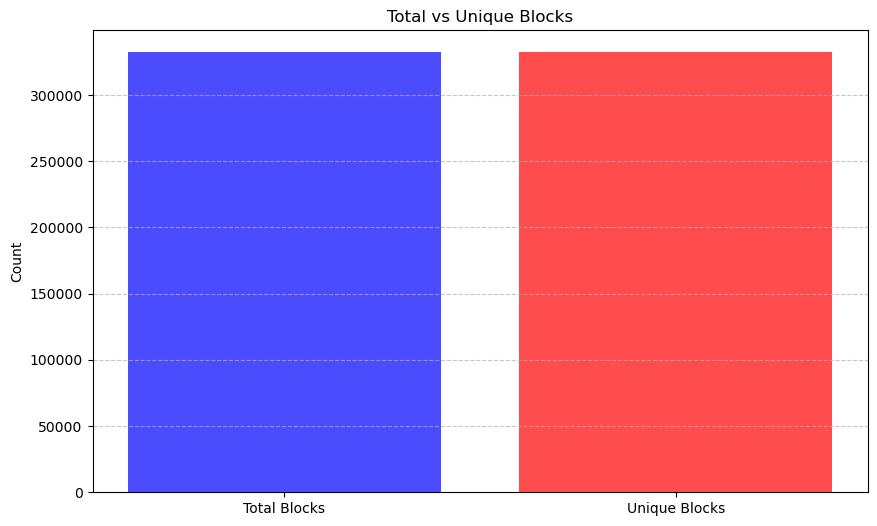


=== Length Leakage Check ===
Ciphertext length: 5315968
Ciphertext length aligns with block size.


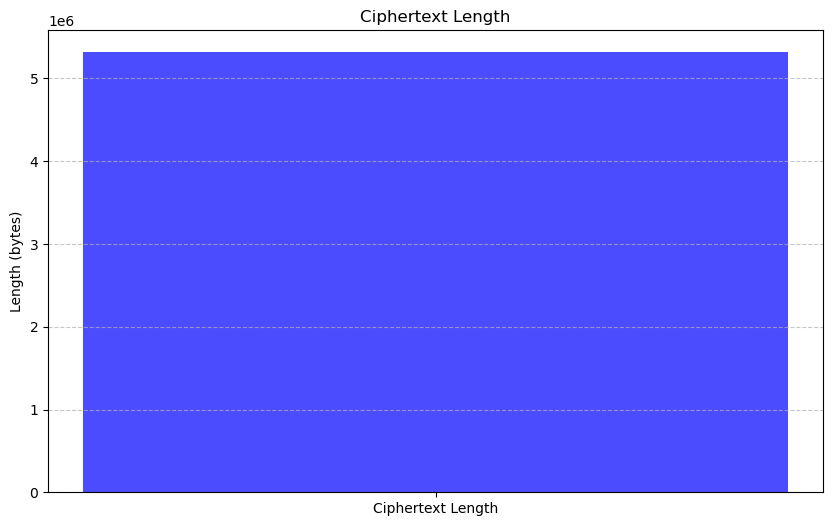


=== Entropy Test ===
Shannon Entropy: 8.0000 (Max: 8.0000)
Ciphertext appears random.


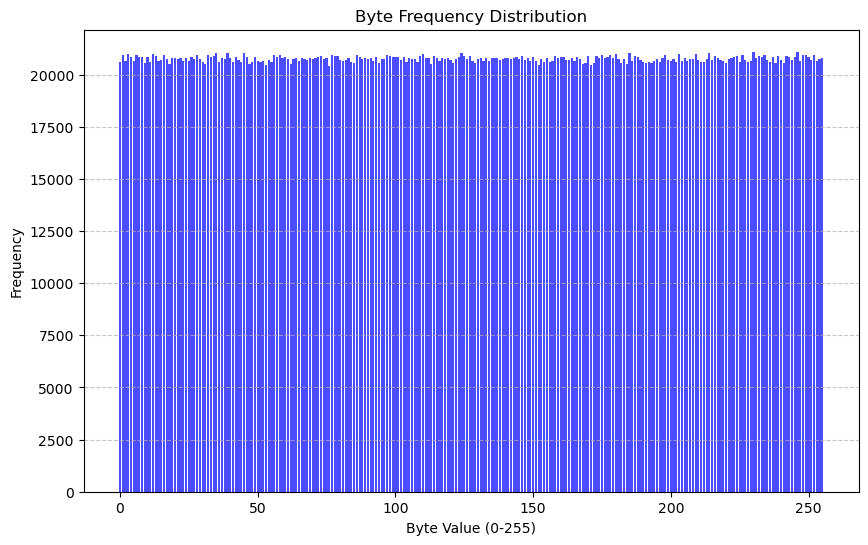


=== Chi-Square Test ===
Chi-Square Statistic: 214.1424, p-value: 0.9704
Ciphertext byte distribution appears uniform.


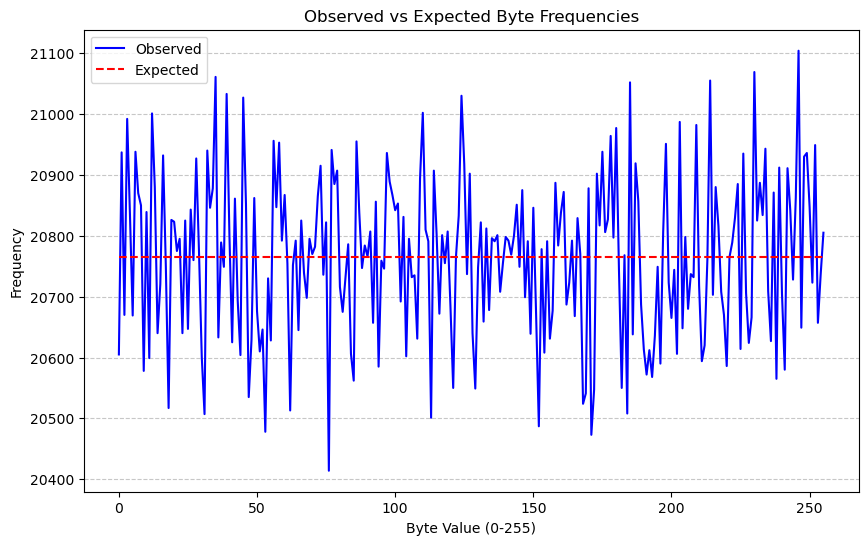

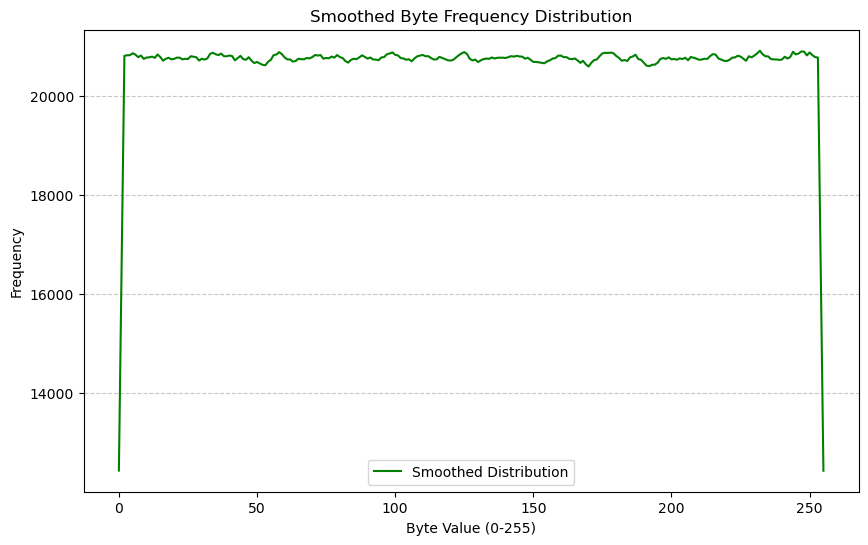


Character Mapping: {'H': 'K', 'E': 'H', 'L': 'O', 'O': 'R', ' ': ' ', 'W': 'Z', 'R': 'U', 'D': 'G'}
Decrypted Text: HELLO, WORLD! VHLIW WHEQ ERXWDL.


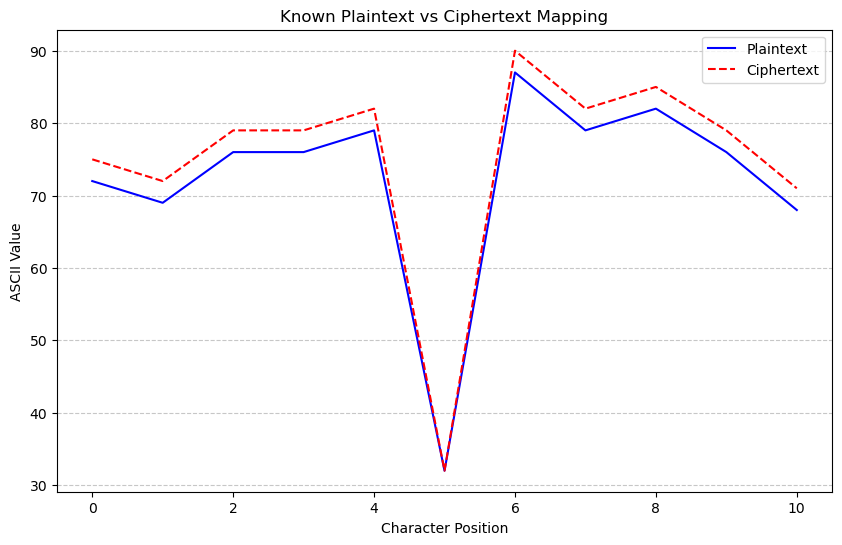

In [ ]:
import os
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Function to create mapping from plaintext to ciphertext
def create_mapping(plaintext, ciphertext):
    mapping = {}
    for p_char, c_char in zip(plaintext, ciphertext):
        if p_char not in mapping:
            mapping[p_char] = c_char
    return mapping

# Function to decrypt a ciphertext using the mapping
def decrypt(ciphertext, mapping):
    reverse_mapping = {v: k for k, v in mapping.items()}
    decrypted_text = ''.join(reverse_mapping.get(c, c) for c in ciphertext)
    return decrypted_text

# Function to analyze patterns in the ciphertext
def analyze_patterns(ciphertext):
    block_size = 16  # AES block size
    blocks = [ciphertext[i:i + block_size] for i in range(0, len(ciphertext), block_size)]
    unique_blocks = set(blocks)
    repetition_count = len(blocks) - len(unique_blocks)

    print(f"=== Pattern Analysis ===")
    print(f"Total blocks: {len(blocks)}")
    print(f"Unique blocks: {len(unique_blocks)}")
    print(f"Repeated blocks: {repetition_count}")

    if repetition_count > 0:
        print("Pattern detected: Repeated blocks found!")
    else:
        print("No repeated blocks detected.")

    # Plotting the blocks and unique blocks
    plt.figure(figsize=(10, 6))
    plt.bar(['Total Blocks', 'Unique Blocks'], [len(blocks), len(unique_blocks)], color=['blue', 'red'], alpha=0.7)
    plt.title("Total vs Unique Blocks")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to check length leakage
def check_length_leakage(ciphertext, block_size=16):
    ciphertext_length = len(ciphertext)
    print(f"\n=== Length Leakage Check ===")
    print(f"Ciphertext length: {ciphertext_length}")
    if ciphertext_length % block_size != 0:
        print("Warning: Ciphertext length is not a multiple of block size!")
    else:
        print("Ciphertext length aligns with block size.")
    
    # Plotting the ciphertext length
    plt.figure(figsize=(10, 6))
    plt.bar(['Ciphertext Length'], [ciphertext_length], color="blue", alpha=0.7)
    plt.title("Ciphertext Length")
    plt.ylabel("Length (bytes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to calculate Shannon entropy
def calculate_entropy(data):
    counter = Counter(data)
    total_length = len(data)
    entropy = -sum((count / total_length) * math.log2(count / total_length) for count in counter.values())
    return entropy

# Function to test entropy and plot distribution
def test_entropy(ciphertext):
    entropy = calculate_entropy(ciphertext)
    print(f"\n=== Entropy Test ===")
    print(f"Shannon Entropy: {entropy:.4f} (Max: {math.log2(256):.4f})")

    if entropy < 7.8:
        print("Warning: Ciphertext may not be sufficiently random!")
    else:
        print("Ciphertext appears random.")

    # Plotting byte frequency distribution
    byte_counts = Counter(ciphertext)
    byte_values = list(range(256))
    frequencies = [byte_counts[byte] for byte in byte_values]

    plt.figure(figsize=(10, 6))
    plt.bar(byte_values, frequencies, color="blue", alpha=0.7)
    plt.title("Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform chi-square test
def chi_square_test(ciphertext):
    byte_counts = [0] * 256
    for byte in ciphertext:
        byte_counts[byte] += 1

    expected = [len(ciphertext) / 256] * 256
    chi2, p = chisquare(byte_counts, expected)
    print(f"\n=== Chi-Square Test ===")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("Warning: Ciphertext byte distribution is not uniform!")
    else:
        print("Ciphertext byte distribution appears uniform.")

    # Plotting observed vs. expected frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(byte_counts, label="Observed", color="blue")
    plt.plot(expected, label="Expected", color="red", linestyle="--")
    plt.title("Observed vs Expected Byte Frequencies")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to plot smoothed frequency distribution
def plot_smoothed_distribution(ciphertext):
    byte_counts = Counter(ciphertext)
    byte_values = np.array(list(range(256)))
    frequencies = np.array([byte_counts[byte] for byte in byte_values])

    # Applying a smoothing kernel
    smoothed_frequencies = np.convolve(frequencies, np.ones(5)/5, mode="same")

    plt.figure(figsize=(10, 6))
    plt.plot(byte_values, smoothed_frequencies, color="green", label="Smoothed Distribution")
    plt.title("Smoothed Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform all COA checks and generate visualizations
def perform_coa_checks(encrypted_file_path):
    if not os.path.exists(encrypted_file_path):
        print(f"Error: File not found at {encrypted_file_path}")
        return

    with open(encrypted_file_path, 'rb') as f:
        ciphertext = f.read()

    print(f"Analyzing encrypted file: {encrypted_file_path}\n")
    analyze_patterns(ciphertext)
    check_length_leakage(ciphertext)
    test_entropy(ciphertext)
    chi_square_test(ciphertext)
    plot_smoothed_distribution(ciphertext)

if __name__ == "__main__":
    # Directly specify the path to your encrypted file here
    encrypted_file_path = r"C:\Users\nagas\OneDrive\Desktop\eocs\encrypted_output.csv"
    perform_coa_checks(encrypted_file_path)

    # Example known plaintext and ciphertext for KPA
    known_plaintext = "HELLO WORLD"
    known_ciphertext = "KHOOR ZRUOG"

    # Create the mapping from the known plaintext and ciphertext
    mapping = create_mapping(known_plaintext, known_ciphertext)
    print(f"\nCharacter Mapping: {mapping}")

    # Example ciphertext to decrypt using the obtained mapping
    new_ciphertext = "KHOOR, ZRUOG! VKLIW ZKHQ EUXWDO."
    decrypted_text = decrypt(new_ciphertext, mapping)
    print(f"Decrypted Text: {decrypted_text}")

    # Plotting known plaintext vs ciphertext mapping
    plt.figure(figsize=(10, 6))
    plt.plot([ord(c) for c in known_plaintext], label ="Plaintext", color="blue")
    plt.plot([ord(c) for c in known_ciphertext], label="Ciphertext", color="red", linestyle="--")
    plt.title("Known Plaintext vs Ciphertext Mapping")
    plt.xlabel("Character Position")
    plt.ylabel("ASCII Value")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

Analyzing encrypted file: /Users/bodapati/Documents/encrypted_data.csv

=== Pattern Analysis ===
Total blocks: 372801
Unique blocks: 372801
Repeated blocks: 0
No repeated blocks detected.


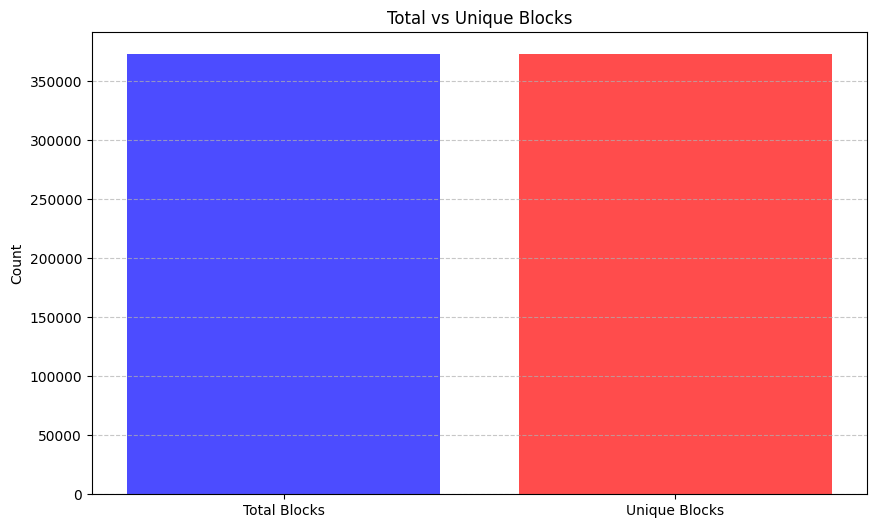


=== Length Leakage Check ===
Ciphertext length: 5964816
Ciphertext length aligns with block size.


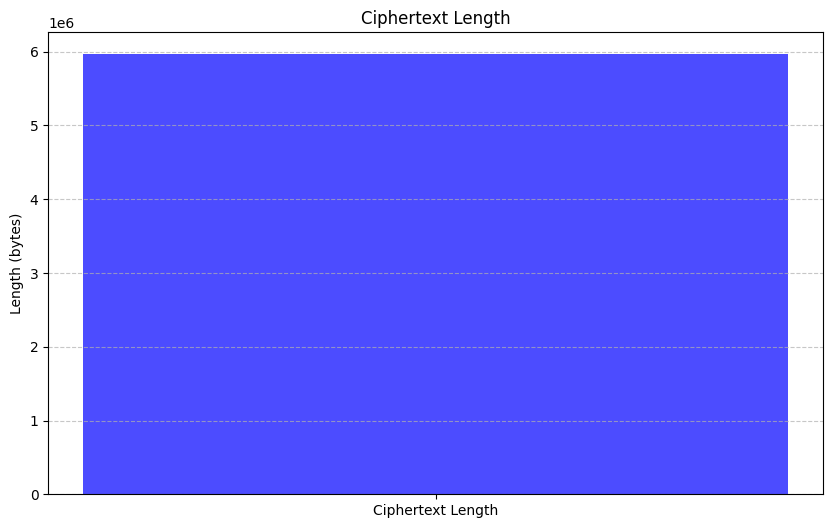


=== Entropy Test ===
Shannon Entropy: 8.0000 (Max: 8.0000)
Ciphertext appears random.


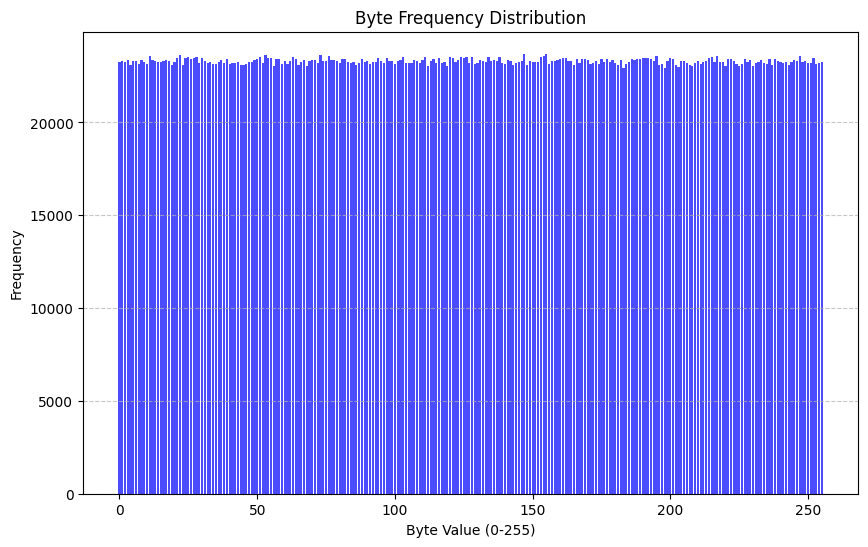


=== Chi-Square Test ===
Chi-Square Statistic: 225.8593, p-value: 0.9055
Ciphertext byte distribution appears uniform.


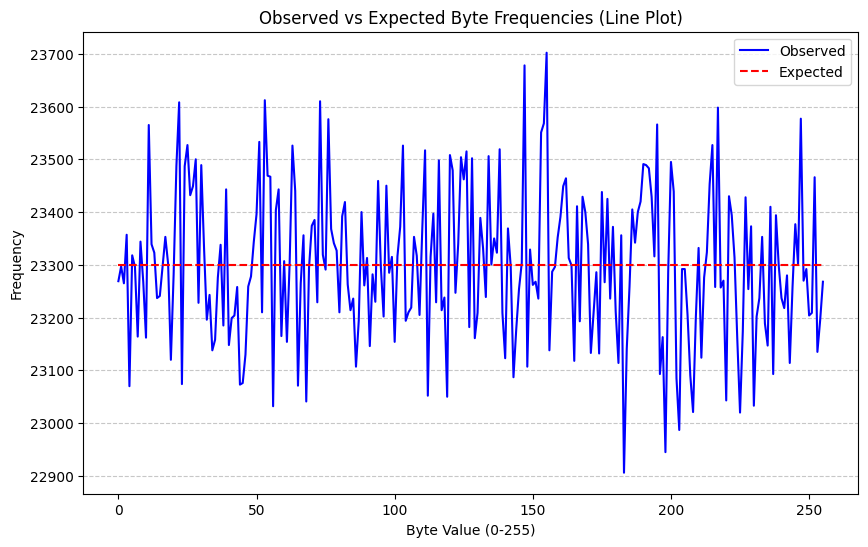

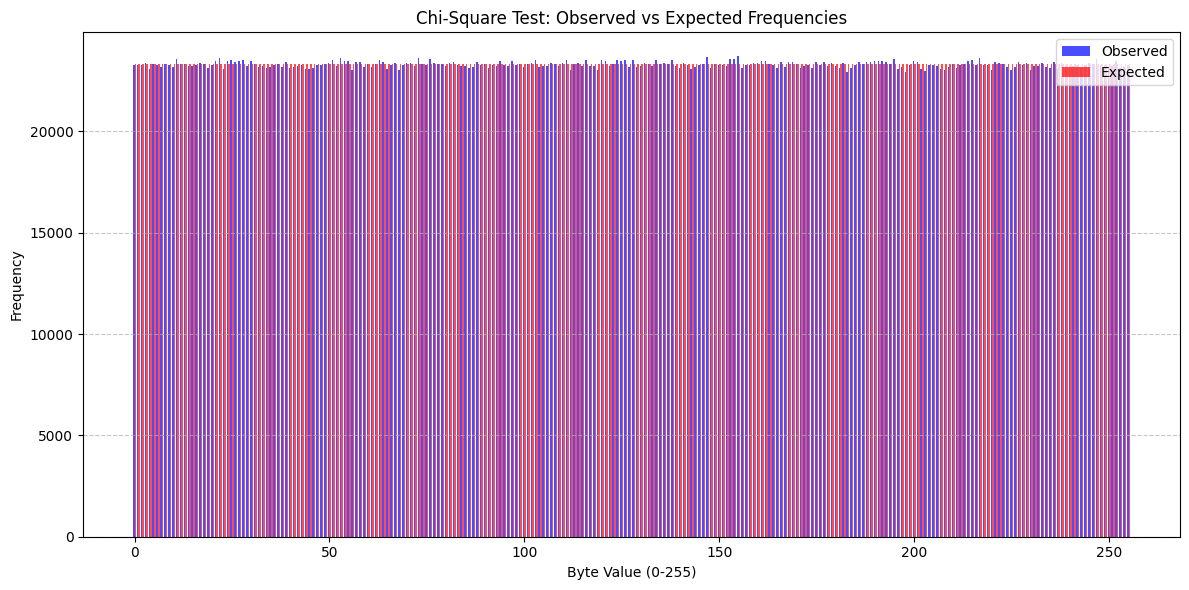

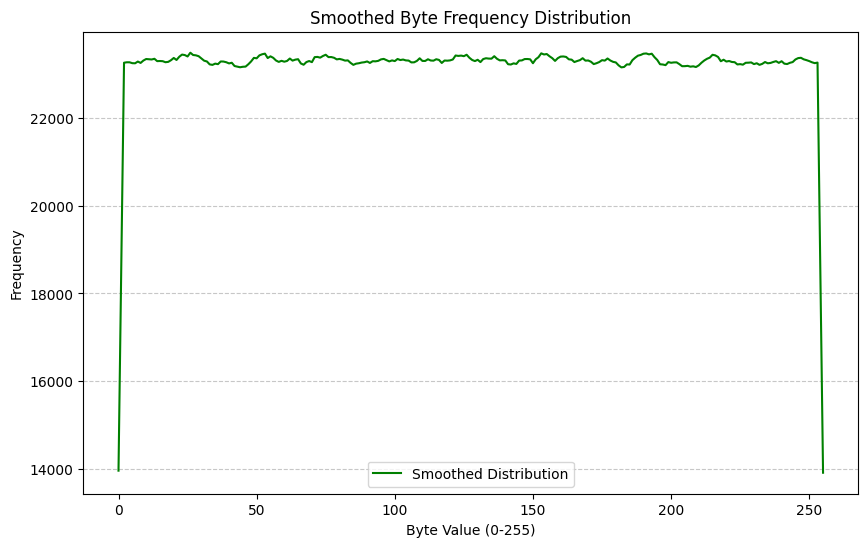


Character Mapping: {'H': 'K', 'E': 'H', 'L': 'O', 'O': 'R', ' ': ' ', 'W': 'Z', 'R': 'U', 'D': 'G'}
Decrypted Text: HELLO, WORLD! VHLIW WHEQ ERXWDL.


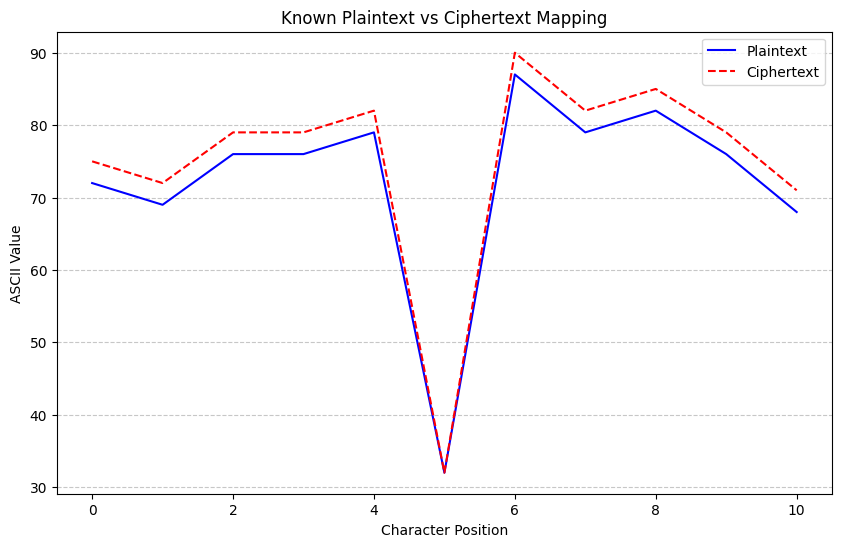

In [ ]:
import os
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Function to create mapping from plaintext to ciphertext
def create_mapping(plaintext, ciphertext):
    mapping = {}
    for p_char, c_char in zip(plaintext, ciphertext):
        if p_char not in mapping:
            mapping[p_char] = c_char
    return mapping

# Function to decrypt a ciphertext using the mapping
def decrypt(ciphertext, mapping):
    reverse_mapping = {v: k for k, v in mapping.items()}
    decrypted_text = ''.join(reverse_mapping.get(c, c) for c in ciphertext)
    return decrypted_text

# Function to analyze patterns in the ciphertext
def analyze_patterns(ciphertext):
    block_size = 16  # AES block size
    blocks = [ciphertext[i:i + block_size] for i in range(0, len(ciphertext), block_size)]
    unique_blocks = set(blocks)
    repetition_count = len(blocks) - len(unique_blocks)

    print(f"=== Pattern Analysis ===")
    print(f"Total blocks: {len(blocks)}")
    print(f"Unique blocks: {len(unique_blocks)}")
    print(f"Repeated blocks: {repetition_count}")

    if repetition_count > 0:
        print("Pattern detected: Repeated blocks found!")
    else:
        print("No repeated blocks detected.")

    # Plotting the blocks and unique blocks
    plt.figure(figsize=(10, 6))
    plt.bar(['Total Blocks', 'Unique Blocks'], [len(blocks), len(unique_blocks)], color=['blue', 'red'], alpha=0.7)
    plt.title("Total vs Unique Blocks")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to check length leakage
def check_length_leakage(ciphertext, block_size=16):
    ciphertext_length = len(ciphertext)
    print(f"\n=== Length Leakage Check ===")
    print(f"Ciphertext length: {ciphertext_length}")
    if ciphertext_length % block_size != 0:
        print("Warning: Ciphertext length is not a multiple of block size!")
    else:
        print("Ciphertext length aligns with block size.")
    
    # Plotting the ciphertext length
    plt.figure(figsize=(10, 6))
    plt.bar(['Ciphertext Length'], [ciphertext_length], color="blue", alpha=0.7)
    plt.title("Ciphertext Length")
    plt.ylabel("Length (bytes)")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to calculate Shannon entropy
def calculate_entropy(data):
    counter = Counter(data)
    total_length = len(data)
    entropy = -sum((count / total_length) * math.log2(count / total_length) for count in counter.values())
    return entropy

# Function to test entropy and plot distribution
def test_entropy(ciphertext):
    entropy = calculate_entropy(ciphertext)
    print(f"\n=== Entropy Test ===")
    print(f"Shannon Entropy: {entropy:.4f} (Max: {math.log2(256):.4f})")

    if entropy < 7.8:
        print("Warning: Ciphertext may not be sufficiently random!")
    else:
        print("Ciphertext appears random.")

    # Plotting byte frequency distribution
    byte_counts = Counter(ciphertext)
    byte_values = list(range(256))
    frequencies = [byte_counts[byte] for byte in byte_values]

    plt.figure(figsize=(10, 6))
    plt.bar(byte_values, frequencies, color="blue", alpha=0.7)
    plt.title("Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform chi-square test with plots
def chi_square_test(ciphertext):
    byte_counts = [0] * 256
    for byte in ciphertext:
        byte_counts[byte] += 1

    expected = [len(ciphertext) / 256] * 256
    chi2, p = chisquare(byte_counts, expected)
    print(f"\n=== Chi-Square Test ===")
    print(f"Chi-Square Statistic: {chi2:.4f}, p-value: {p:.4f}")

    if p < 0.05:
        print("Warning: Ciphertext byte distribution is not uniform!")
    else:
        print("Ciphertext byte distribution appears uniform.")

    # Plotting observed vs expected frequencies - Line plot
    plt.figure(figsize=(10, 6))
    plt.plot(byte_counts, label="Observed", color="blue")
    plt.plot(expected, label="Expected", color="red", linestyle="--")
    plt.title("Observed vs Expected Byte Frequencies (Line Plot)")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # New bar plot for Chi-Square test
    plt.figure(figsize=(12, 6))
    byte_values = np.arange(256)
    width = 0.4
    
    plt.bar(byte_values - width/2, byte_counts, width, label='Observed', color='blue', alpha=0.7)
    plt.bar(byte_values + width/2, expected, width, label='Expected', color='red', alpha=0.7)
    
    plt.title("Chi-Square Test: Observed vs Expected Frequencies")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function to plot smoothed frequency distribution
def plot_smoothed_distribution(ciphertext):
    byte_counts = Counter(ciphertext)
    byte_values = np.array(list(range(256)))
    frequencies = np.array([byte_counts[byte] for byte in byte_values])

    # Applying a smoothing kernel
    smoothed_frequencies = np.convolve(frequencies, np.ones(5)/5, mode="same")

    plt.figure(figsize=(10, 6))
    plt.plot(byte_values, smoothed_frequencies, color="green", label="Smoothed Distribution")
    plt.title("Smoothed Byte Frequency Distribution")
    plt.xlabel("Byte Value (0-255)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Function to perform all COA checks and generate visualizations
def perform_coa_checks(encrypted_file_path):
    if not os.path.exists(encrypted_file_path):
        print(f"Error: File not found at {encrypted_file_path}")
        return

    with open(encrypted_file_path, 'rb') as f:
        ciphertext = f.read()

    print(f"Analyzing encrypted file: {encrypted_file_path}\n")
    analyze_patterns(ciphertext)
    check_length_leakage(ciphertext)
    test_entropy(ciphertext)
    chi_square_test(ciphertext)
    plot_smoothed_distribution(ciphertext)

if __name__ == "__main__":
    # Directly specify the path to your encrypted file here
    encrypted_file_path = "/Users/bodapati/Documents/encrypted_data.csv"
    perform_coa_checks(encrypted_file_path)

    # Example known plaintext and ciphertext for KPA
    known_plaintext = "HELLO WORLD"
    known_ciphertext = "KHOOR ZRUOG"

    # Create the mapping from the known plaintext and ciphertext
    mapping = create_mapping(known_plaintext, known_ciphertext)
    print(f"\nCharacter Mapping: {mapping}")

    # Example ciphertext to decrypt using the obtained mapping
    new_ciphertext = "KHOOR, ZRUOG! VKLIW ZKHQ EUXWDO."
    decrypted_text = decrypt(new_ciphertext, mapping)
    print(f"Decrypted Text: {decrypted_text}")

    # Plotting known plaintext vs ciphertext mapping
    plt.figure(figsize=(10, 6))
    plt.plot([ord(c) for c in known_plaintext], label="Plaintext", color="blue")
    plt.plot([ord(c) for c in known_ciphertext], label="Ciphertext", color="red", linestyle="--")
    plt.title("Known Plaintext vs Ciphertext Mapping")
    plt.xlabel("Character Position")vc
    plt.ylabel("ASCII Value")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

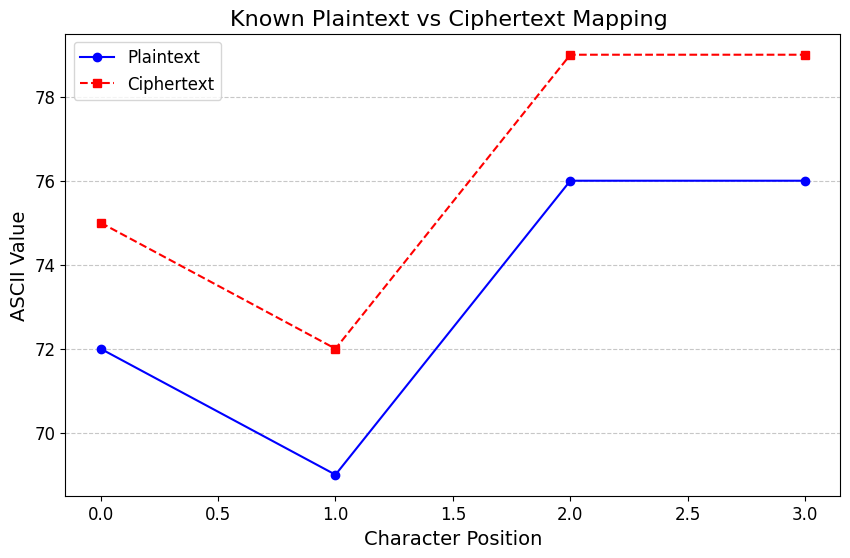

In [5]:
import matplotlib.pyplot as plt

# Example known plaintext and ciphertext for KPA
known_plaintext = "HELLO WORLD"
known_ciphertext = "KHOOR ZRUOG"

# Plotting known plaintext vs ciphertext mapping (Character Positions 0-3)
plt.figure(figsize=(10, 6))
plt.plot(range(4), [ord(c) for c in known_plaintext[:4]], label="Plaintext", color="blue", marker='o')
plt.plot(range(4), [ord(c) for c in known_ciphertext[:4]], label="Ciphertext", color="red", linestyle="--", marker='s')

plt.title("Known Plaintext vs Ciphertext Mapping ", fontsize=16)
plt.xlabel("Character Position", fontsize=14)
plt.ylabel("ASCII Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


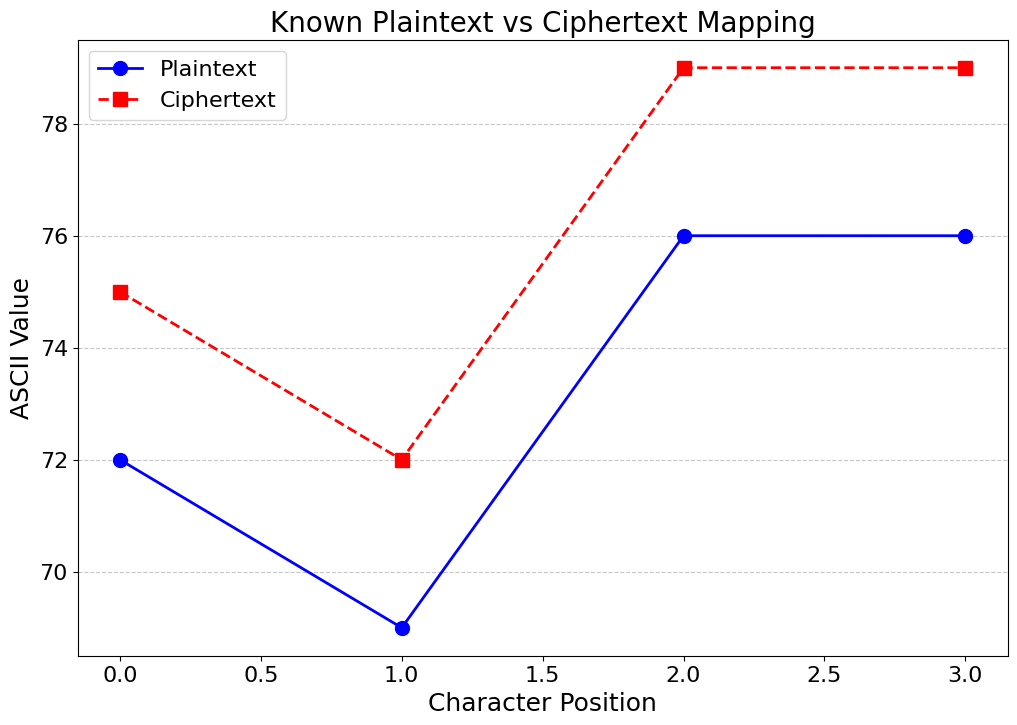

In [6]:
import matplotlib.pyplot as plt

# Example known plaintext and ciphertext for KPA
known_plaintext = "HELLO WORLD"
known_ciphertext = "KHOOR ZRUOG"

# Plotting known plaintext vs ciphertext mapping (Character Positions 0-3)
plt.figure(figsize=(12, 8))
plt.plot(range(4), [ord(c) for c in known_plaintext[:4]], label="Plaintext", color="blue", marker='o', markersize=10, linewidth=2)
plt.plot(range(4), [ord(c) for c in known_ciphertext[:4]], label="Ciphertext", color="red", linestyle="--", marker='s', markersize=10, linewidth=2)

plt.title("Known Plaintext vs Ciphertext Mapping", fontsize=20)
plt.xlabel("Character Position", fontsize=18)
plt.ylabel("ASCII Value", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


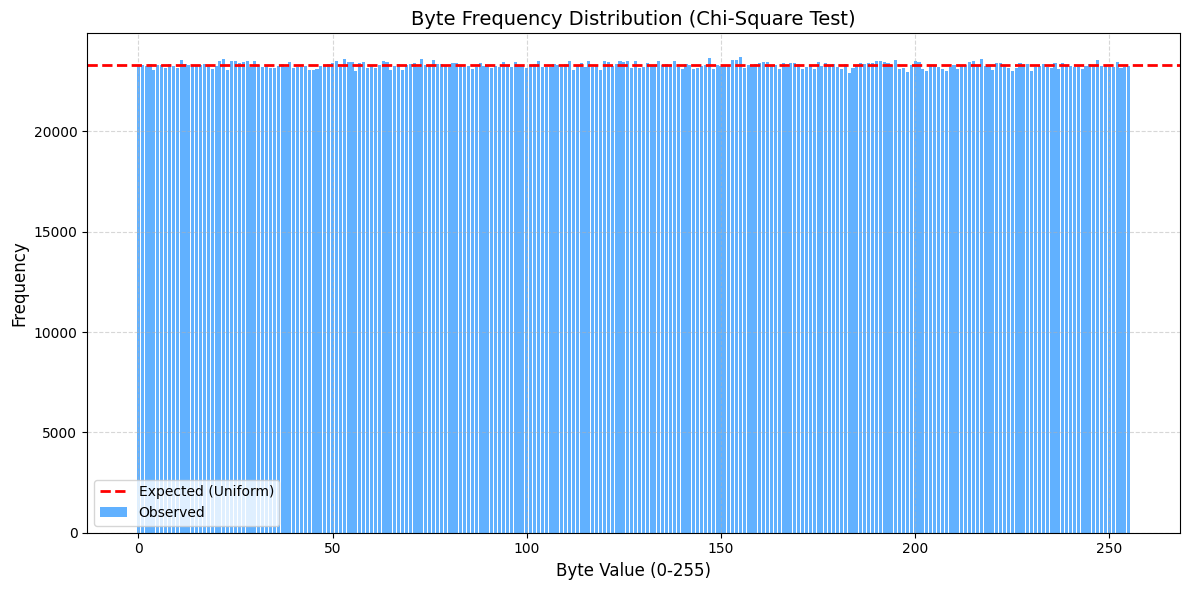

Chi-Square Test Results:
  Chi-Square Statistic: 225.86
  Reduced Chi-Square: 0.8857 (close to 1 indicates uniformity)


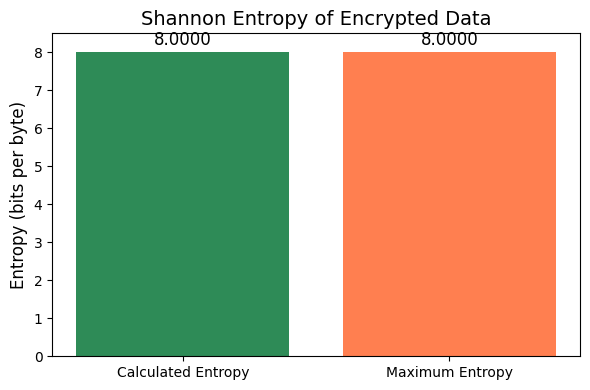

Shannon Entropy: 8.0000 bits per byte (Maximum possible: 8.0000)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Path to your encrypted CSV file (update this to your file's location)
encrypted_csv = "/Users/bodapati/Documents/encrypted_data.csv"

# Read the file as binary data
with open(encrypted_csv, 'rb') as f:
    data = f.read()
bytes_data = np.frombuffer(data, dtype=np.uint8)

# --- Chi-Square Test ---
byte_counts = np.bincount(bytes_data, minlength=256)
expected = len(bytes_data) / 256  # Expected frequency for uniform distribution
chi_square_stat = np.sum((byte_counts - expected)**2 / expected)
df = 255  # Degrees of freedom (256 - 1)
reduced_chi_square = chi_square_stat / df

# Plot for Chi-Square Test
plt.figure(figsize=(12, 6))
plt.bar(range(256), byte_counts, color='dodgerblue', alpha=0.7, label='Observed')
plt.axhline(expected, color='red', linestyle='--', linewidth=2, label='Expected (Uniform)')
plt.title('Byte Frequency Distribution (Chi-Square Test)', fontsize=14)
plt.xlabel('Byte Value (0-255)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Chi-Square Test Results:")
print(f"  Chi-Square Statistic: {chi_square_stat:.2f}")
print(f"  Reduced Chi-Square: {reduced_chi_square:.4f} (close to 1 indicates uniformity)")

# --- Shannon Entropy Test ---
probabilities = byte_counts / len(bytes_data)
entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0) with small constant
max_entropy = 8  # Maximum entropy for byte data

# Plot for Shannon Entropy Test
plt.figure(figsize=(6, 4))
plt.bar(['Calculated Entropy', 'Maximum Entropy'], [entropy, max_entropy], color=['seagreen', 'coral'])
plt.title('Shannon Entropy of Encrypted Data', fontsize=14)
plt.ylabel('Entropy (bits per byte)', fontsize=12)
plt.ylim(0, 8.5)
for i, v in enumerate([entropy, max_entropy]):
    plt.text(i, v + 0.2, f"{v:.4f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Shannon Entropy: {entropy:.4f} bits per byte (Maximum possible: 8.0000)")

/var/folders/tx/k8p2xbtn0cjgvn8dh714226r0000gn/T/ipykernel_20035/3199061657.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


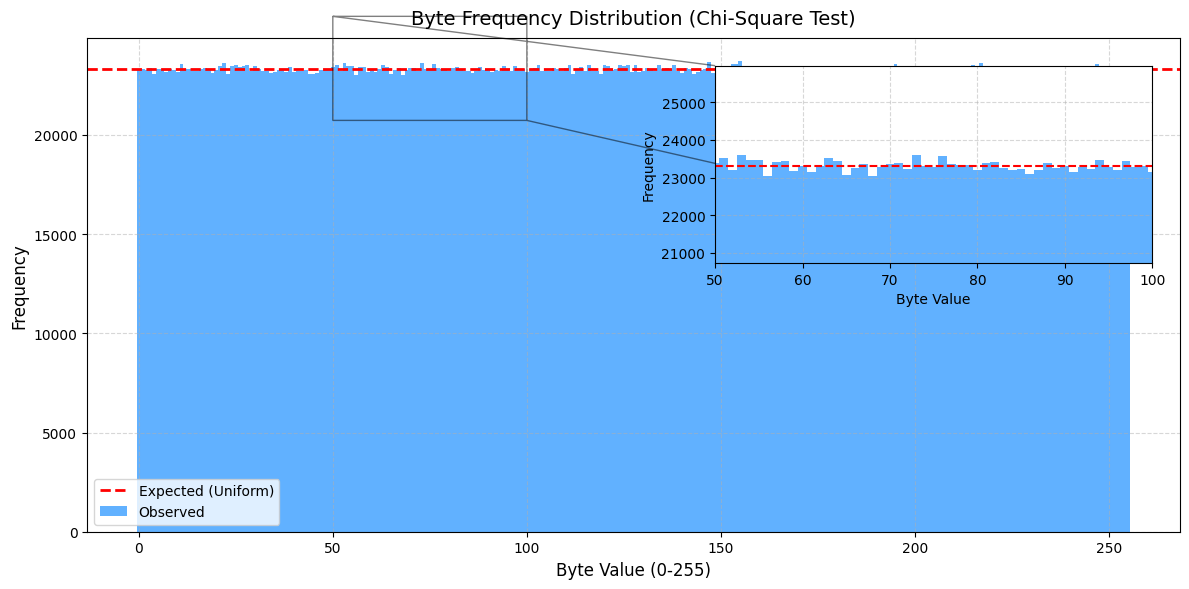

Chi-Square Test Results:
  Chi-Square Statistic: 225.86
  Reduced Chi-Square: 0.8857 (close to 1 indicates uniformity)


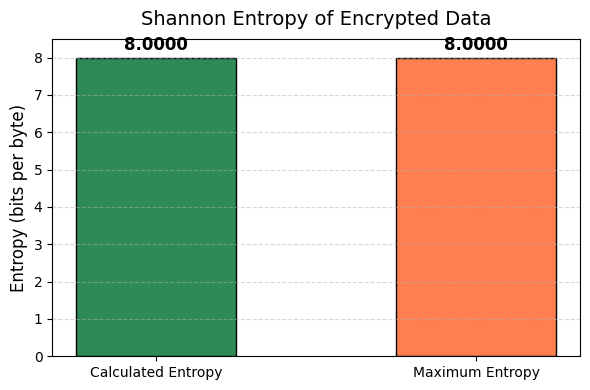

Shannon Entropy: 8.0000 bits per byte (Maximum possible: 8.0000)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Path to your encrypted CSV file
encrypted_csv = "/Users/bodapati/Documents/encrypted_data.csv"

# Read the file as binary data
with open(encrypted_csv, 'rb') as f:
    data = f.read()
bytes_data = np.frombuffer(data, dtype=np.uint8)

# --- Chi-Square Test ---
byte_counts = np.bincount(bytes_data, minlength=256)
expected = len(bytes_data) / 256  # Expected frequency for uniform distribution
chi_square_stat = np.sum((byte_counts - expected)**2 / expected)
df = 255  # Degrees of freedom (256 - 1)
reduced_chi_square = chi_square_stat / df

# Plot for Chi-Square Test with Zoom
plt.figure(figsize=(12, 6))
plt.bar(range(256), byte_counts, color='dodgerblue', alpha=0.7, label='Observed', width=1.0)
plt.axhline(expected, color='red', linestyle='--', linewidth=2, label='Expected (Uniform)')
plt.title('Byte Frequency Distribution (Chi-Square Test)', fontsize=14, pad=10)
plt.xlabel('Byte Value (0-255)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

# Add inset plot for zoomed section (e.g., byte values 50-100)
ax = plt.gca()
axins = inset_axes(ax, width="40%", height="40%", loc='upper right', borderpad=2)
zoom_range = range(50, 101)  # Zoom into byte values 50-100
axins.bar(zoom_range, byte_counts[50:101], color='dodgerblue', alpha=0.7, width=1.0)
axins.axhline(expected, color='red', linestyle='--', linewidth=1.5)
axins.grid(True, linestyle='--', alpha=0.5)
axins.set_xlim(50, 100)
axins.set_ylim(min(byte_counts[50:101]) * 0.9, max(byte_counts[50:101]) * 1.1)  # Adjust zoom y-range
axins.set_xlabel('Byte Value', fontsize=10)
axins.set_ylabel('Frequency', fontsize=10)

# Mark the zoomed region on the main plot
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.tight_layout()
plt.savefig('chi_square_test.png', dpi=300)  # Save as high-res for journal
plt.show()

print(f"Chi-Square Test Results:")
print(f"  Chi-Square Statistic: {chi_square_stat:.2f}")
print(f"  Reduced Chi-Square: {reduced_chi_square:.4f} (close to 1 indicates uniformity)")

# --- Shannon Entropy Test ---
probabilities = byte_counts / len(bytes_data)
entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)
max_entropy = 8  # Maximum entropy for byte data

# Plot for Shannon Entropy Test (Enhanced for Journal)
plt.figure(figsize=(6, 4))
bars = plt.bar(['Calculated Entropy', 'Maximum Entropy'], [entropy, max_entropy], 
               color=['seagreen', 'coral'], width=0.5, edgecolor='black', linewidth=1)
plt.title('Shannon Entropy of Encrypted Data', fontsize=14, pad=10)
plt.ylabel('Entropy (bits per byte)', fontsize=12)
plt.ylim(0, 8.5)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

# Add text annotations above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.4f}", 
             ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('shannon_entropy_test.png', dpi=300)  # Save as high-res for journal
plt.show()

print(f"Shannon Entropy: {entropy:.4f} bits per byte (Maximum possible: 8.0000)")

/var/folders/tx/k8p2xbtn0cjgvn8dh714226r0000gn/T/ipykernel_67065/1592069917.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


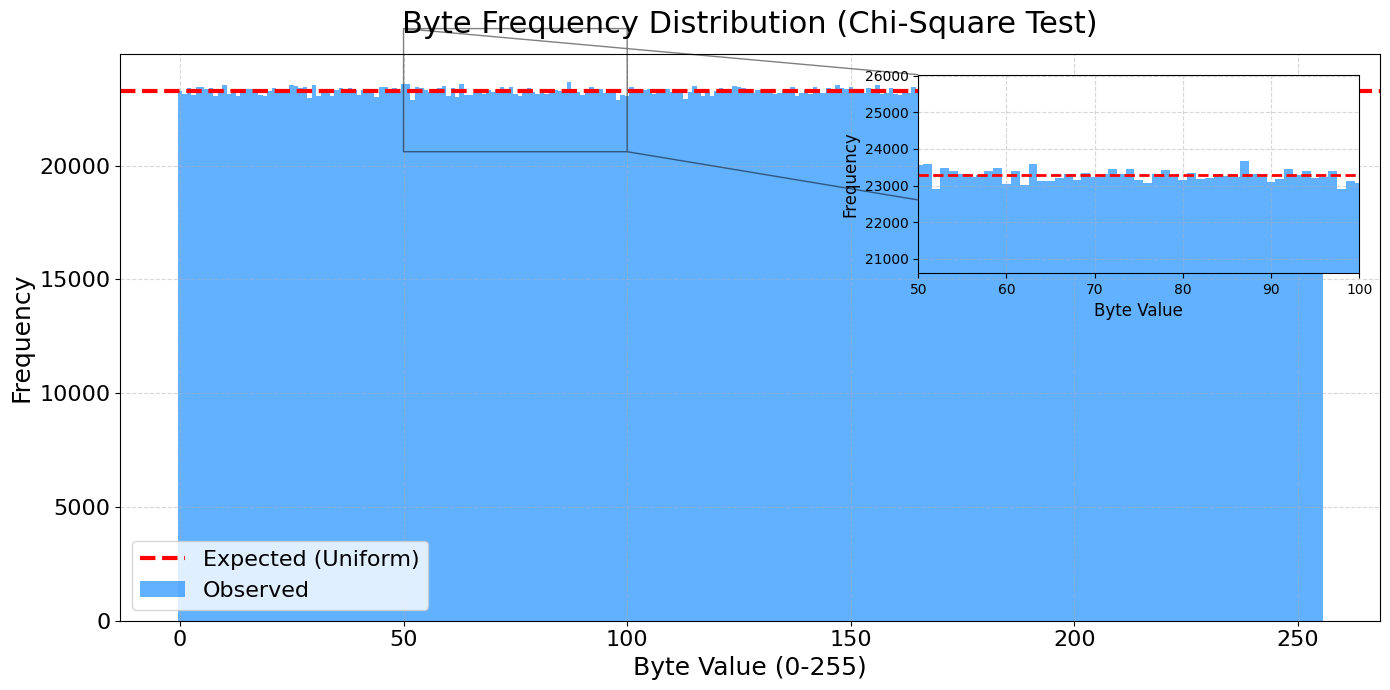

Chi-Square Test Results:
  Chi-Square Statistic: 253.40
  Reduced Chi-Square: 0.9937 (close to 1 indicates uniformity)


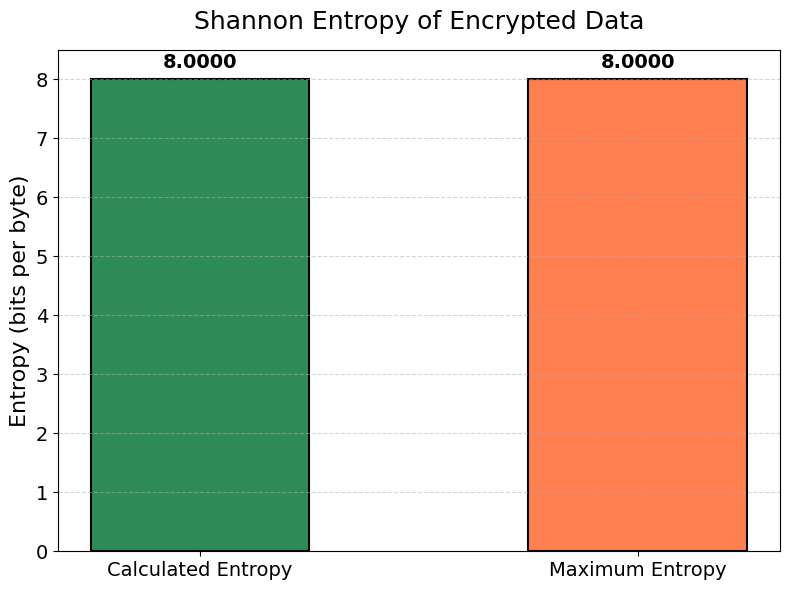

Shannon Entropy: 8.0000 bits per byte (Maximum possible: 8.0000)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Path to your encrypted CSV file
encrypted_csv = "/Users/bodapati/Documents/encrypted_data.csv"

# Read the file as binary data
with open(encrypted_csv, 'rb') as f:
    data = f.read()
bytes_data = np.frombuffer(data, dtype=np.uint8)

# --- Chi-Square Test ---
byte_counts = np.bincount(bytes_data, minlength=256)
expected = len(bytes_data) / 256  # Expected frequency for uniform distribution
chi_square_stat = np.sum((byte_counts - expected)**2 / expected)
df = 255  # Degrees of freedom (256 - 1)
reduced_chi_square = chi_square_stat / df

# Plot for Chi-Square Test with Zoom
plt.figure(figsize=(14, 7))
plt.bar(range(256), byte_counts, color='dodgerblue', alpha=0.7, label='Observed', width=1.0)
plt.axhline(expected, color='red', linestyle='--', linewidth=3, label='Expected (Uniform)')
plt.title('Byte Frequency Distribution (Chi-Square Test)', fontsize=22, pad=15)
plt.xlabel('Byte Value (0-255)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)

# Add inset plot for zoomed section (e.g., byte values 50-100)
ax = plt.gca()
axins = inset_axes(ax, width="35%", height="35%", loc='upper right', borderpad=1.5)
zoom_range = range(50, 101)  # Zoom into byte values 50-100
axins.bar(zoom_range, byte_counts[50:101], color='dodgerblue', alpha=0.7, width=1.0)
axins.axhline(expected, color='red', linestyle='--', linewidth=2)
axins.grid(True, linestyle='--', alpha=0.5)
axins.set_xlim(50, 100)
axins.set_ylim(min(byte_counts[50:101]) * 0.9, max(byte_counts[50:101]) * 1.1)  # Adjust zoom y-range
axins.set_xlabel('Byte Value', fontsize=12)
axins.set_ylabel('Frequency', fontsize=12)

# Mark the zoomed region on the main plot
ax.indicate_inset_zoom(axins, edgecolor="black")
plt.tight_layout()
plt.savefig('chi_square_test.png', dpi=300)  # Save as high-res for journal
plt.show()

print(f"Chi-Square Test Results:")
print(f"  Chi-Square Statistic: {chi_square_stat:.2f}")
print(f"  Reduced Chi-Square: {reduced_chi_square:.4f} (close to 1 indicates uniformity)")

# --- Shannon Entropy Test ---
probabilities = byte_counts / len(bytes_data)
entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))  # Avoid log(0)
max_entropy = 8  # Maximum entropy for byte data

# Plot for Shannon Entropy Test (Enhanced for Journal)
plt.figure(figsize=(8, 6))
bars = plt.bar(['Calculated Entropy', 'Maximum Entropy'], [entropy, max_entropy], 
               color=['seagreen', 'coral'], width=0.5, edgecolor='black', linewidth=1.5)
plt.title('Shannon Entropy of Encrypted Data', fontsize=18, pad=15)
plt.ylabel('Entropy (bits per byte)', fontsize=16)
plt.ylim(0, 8.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

# Add text annotations above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f"{yval:.4f}", 
             ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('shannon_entropy_test.png', dpi=300)  # Save as high-res for journal
plt.show()

print(f"Shannon Entropy: {entropy:.4f} bits per byte (Maximum possible: 8.0000)")
